In [1]:
# import YOLO model
from ultralytics import YOLO

In [2]:
# input size 640x640

In [3]:
# Load a model
model = YOLO('yolov8n-cls.pt') # load a pretrained model (recommended for training)

In [4]:
# Train the model
model.train(data='./dataset/', epochs=5)

New https://pypi.org/project/ultralytics/8.1.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.184 🚀 Python-3.10.11 torch-2.0.1 CPU (Apple M1 Pro)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=./dataset/, epochs=5, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=N

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x2d6ccd600>
fitness: 0.9611398875713348
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9222797751426697, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9611398875713348}
save_dir: PosixPath('/Users/frederic.birwe/Desktop/test/pagina-finder-webapp/runs/classify/train16')
speed: {'preprocess': 0.0003205679858904428, 'inference': 12.630874011183032, 'loss': 3.6442218049202556e-05, 'postprocess': 3.335389448571081e-05}
top1: 0.9222797751426697
top5: 1.0

In [5]:
metrics = model.val() # no arguments needed, dataset and settings remembered
metrics.top1 # top1 accuracy
metrics.top5 # top5 accuracy

Ultralytics YOLOv8.0.184 🚀 Python-3.10.11 torch-2.0.1 CPU (Apple M1 Pro)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /Users/frederic.birwe/Documents/GitHub/master-thesis_moire_detection/60_gebastel/Model/dataset/train... found 1978 images in 2 classes ✅ 
val: /Users/frederic.birwe/Documents/GitHub/master-thesis_moire_detection/60_gebastel/Model/dataset/val... found 386 images in 2 classes ✅ 
test: /Users/frederic.birwe/Documents/GitHub/master-thesis_moire_detection/60_gebastel/Model/dataset/test... found 326 images in 2 classes ✅ 
val: Scanning /Users/frederic.birwe/Documents/GitHub/master-thesis_moire_d
               classes   top1_acc   top5_acc: 100%|██████████| 25/25 [00:0
                   all      0.922          1
Speed: 0.0ms preprocess, 14.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /Users/frederic.birwe/Desktop/test/pagina-finder-webapp/runs/classify/val14


1.0

In [6]:
str(metrics.save_dir)

'/Users/frederic.birwe/Desktop/test/pagina-finder-webapp/runs/classify/val14'

In [7]:
!open '/Users/frederic.birwe/Desktop/test/pagina-finder-webapp/runs/classify/val11'

In [8]:
metrics.confusion_matrix.matrix

array([[        187,          24],
       [          6,         169]])

In [9]:
from pathlib import Path
import torch
import plotly.express as px
from tqdm import tqdm

In [10]:
from PIL import Image

In [11]:
moire_img = list( Path('./dataset/real_val/moire/').glob('./*.jpg') )
non_moire_img = list( Path('./dataset/real_val/no_moire/').glob('./*.jpg') )

data = moire_img + non_moire_img
labels = [1 for i in moire_img] + [0 for i in non_moire_img]

In [12]:
model.val()
predictions = []
target_labels = []

for entry in tqdm(data):
    pred = model.predict(entry, verbose=False)[0].probs.data
    predictions.append(pred)
    target_labels.append( 1 - int(torch.argmax(pred)) )

Ultralytics YOLOv8.0.184 🚀 Python-3.10.11 torch-2.0.1 CPU (Apple M1 Pro)
train: /Users/frederic.birwe/Documents/GitHub/master-thesis_moire_detection/60_gebastel/Model/dataset/train... found 1978 images in 2 classes ✅ 
val: /Users/frederic.birwe/Documents/GitHub/master-thesis_moire_detection/60_gebastel/Model/dataset/val... found 386 images in 2 classes ✅ 
test: /Users/frederic.birwe/Documents/GitHub/master-thesis_moire_detection/60_gebastel/Model/dataset/test... found 326 images in 2 classes ✅ 
val: Scanning /Users/frederic.birwe/Documents/GitHub/master-thesis_moire_d
               classes   top1_acc   top5_acc: 100%|██████████| 25/25 [00:0
                   all      0.922          1
Speed: 0.0ms preprocess, 14.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /Users/frederic.birwe/Desktop/test/pagina-finder-webapp/runs/classify/val15
100%|█████████████████████████████████| 4079/4079 [00:59<00:00, 68.65it/s]


In [13]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(len(labels)):
    # Positive == 1, Negative == 0
    res = labels[i] - target_labels[i]
    if res == 0:
        if labels[i] == 1:
            TP += 1
        else:
            TN += 1
    elif res == -1:
        FP += 1
    else:
        FN += 1

recall = TP / (TP + FN)
precision = TP / (TP + FP)
correct_values = TP + TN
accuracy = correct_values / len(labels)

In [14]:
TP, TN, FP, FN

(2308, 0, 0, 1771)

In [15]:
recall, precision

(0.5658249570973278, 1.0)

In [16]:
f"{(TP + TN)}/{len(labels)}, {accuracy}"

'2308/4079, 0.5658249570973278'

In [17]:
FN, TP

(1771, 2308)

In [18]:
from random import randrange

3458 tensor([0.6434, 0.3566]) 1


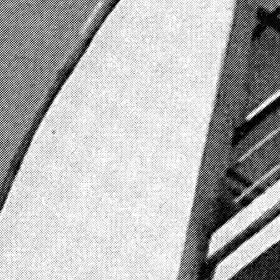

In [19]:
i = randrange(len(data))
print(i, predictions[i], target_labels[i])
Image.open(data[i])

In [ ]:
px.scatter(
    [p[0] for p in predictions]
)

In [ ]:
px.scatter(
    [p[1] for p in predictions]
)